<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/HW_2_1_Linear_regression_on_multiple_variables_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/cars.csv')
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
print('Іформація про всі колонки:')
df.info()

Іформація про всі колонки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
def df_report(df):
  report = {'numerical columns': df.columns[df.dtypes == "int"].to_list(),
            'numerical column count': sum(df.dtypes == "int"),
            'categorical columns': df.columns[df.dtypes == "object"].to_list(),
            'categorical columns count': sum(df.dtypes == "object"),
            'categorical binar columns': [],
            'categoracal multicategor columns': [],
            #'categorical order columns':[]
            }

  df_columns_report = {'column name': [],
                      'column type': [],
                      'number of unique values': [],
                      'values or range of values (min, max)':[]
                      }

  for column in df.columns:
    df_columns_report['column name'].append(column)
    df_columns_report['column type'].append(df[column].dtypes)
    df_columns_report['number of unique values'].append(df[column].nunique())
    if df[column].dtypes == 'object':
      column_values = df[column].unique()
      df_columns_report['values or range of values (min, max)'].append(column_values)
      if len(column_values) == 2:
        report['categorical binar columns'].append(column)
      else:
        report['categoracal multicategor columns'].append(column)
    else:
      df_columns_report['values or range of values (min, max)'].append((df[column].min(), df[column].max()))

  from tabulate import tabulate

  print(tabulate(report.items(), headers=['Сriterion name', 'Value'], tablefmt='grid'), end = '\n\n')


  df_report_result = pd.DataFrame(df_columns_report)
  return df_report_result

In [5]:
df_report(df)

+----------------------------------+-----------------------------------------------------------------------------------------+
| Сriterion name                   | Value                                                                                   |
+==================================+=========================================================================================+
| numerical columns                | ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'] |
+----------------------------------+-----------------------------------------------------------------------------------------+
| numerical column count           | 8                                                                                       |
+----------------------------------+-----------------------------------------------------------------------------------------+
| categorical columns              | ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']             

,column name,column type,number of unique values,"values or range of values (min, max)"
0,Car_ID,int64,100,"(1, 100)"
1,Brand,object,11,"[Toyota, Honda, Ford, Maruti, Hyundai, Tata, M..."
2,Model,object,58,"[Corolla, Civic, Mustang, Swift, Sonata, Nexon..."
3,Year,int64,6,"(2016, 2021)"
4,Kilometers_Driven,int64,18,"(10000, 60000)"
5,Fuel_Type,object,2,"[Petrol, Diesel]"
6,Transmission,object,2,"[Manual, Automatic]"
7,Owner_Type,object,3,"[First, Second, Third]"
8,Mileage,int64,15,"(10, 25)"
9,Engine,int64,36,"(999, 4951)"


**Висновок:**
В наборі даних 8 числових та 5 категоріальних колонок, з них:
- 2 бінарні (мають лише 2 значення): Fuel_Type та Transmission
- 2 мультикатегоріальні (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand і Model
- 1 колонка, в якій можна встановити відношення порядку:  Owner_Type зі значеннями: [First, Second, Third]

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price', 'Car_ID'], axis = 1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [7]:
# Кодування Fuel_Type
most_common_fuel = X_train['Fuel_Type'].value_counts().idxmax()
X_train['Fuel_Type_code'] = (X_train['Fuel_Type'] == most_common_fuel).astype(int)
X_test['Fuel_Type_code'] = (X_test['Fuel_Type'] == most_common_fuel).astype(int)

# Кодування Transmission
most_common_trans = X_train['Transmission'].value_counts().idxmax()
X_train['Transmission_code'] = (X_train['Transmission'] == most_common_trans).astype(int)
X_test['Transmission_code'] = (X_test['Transmission'] == most_common_trans).astype(int)

In [8]:
# Кодування Brand
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() # Створення екземпляру кодувальника — об'єкт enc, який буде знати, як кодувати категорії
enc.fit(X_train[['Brand']]) # "Навчання" кодувальника на колонці 'Brand' з тренувального набору. Тепер enc знає всі  категорії, в якому вони порядку, і як їх кодувати.
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [10]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [11]:
df.groupby('Brand').Model.nunique()

,Model
Brand,
Audi,6
BMW,6
Ford,6
Honda,4
Hyundai,6
Mahindra,3
Maruti,4
Mercedes,5
Tata,6


In [12]:
df.groupby('Brand').Model.unique()

,Model
Brand,
Audi,"[A4, Q3, A6, A3, Q7, A5]"
BMW,"[X1, 5 Series, X3, 7 Series, X5, 3 Series]"
Ford,"[Mustang, Endeavour, Figo, Aspire, Ranger, Eco..."
Honda,"[Civic, City, WR-V, BR-V]"
Hyundai,"[Sonata, Creta, Verna, Elantra, Santro, Venue]"
Mahindra,"[Scorpio, Thar, XUV300]"
Maruti,"[Swift, Ertiga, Vitara, S-Cross]"
Mercedes,"[C-Class, GLC, E-Class, GLE, GLA]"
Tata,"[Nexon, Harrier, Altroz, Safari, Tigor, Tiago]"


***Кодування колонки Model***

Колонка містить 58 унікальних значень і додавати більше 50 стовбчиків за допомогою OneHotEncoder  недоцільно. Можна використати двійкове кодування: значення від 1 до 58 записуються двійковими числами, 58 в двійковій системі 111010 має шість розрядів, для кодування таких значень достатньо шести нових колонок.

В даних модель автомобіля пов'язана з назвою бренду. І для кожного з брендів представлено максимум шість моделей. Тому можна скористатися двійковим кодуванням для кожного бренду окремо. В такому випадку максимальне значення 6 буде закодоване як 110 і потребує всього три нові стовбчики для представлення таких даних.

Існують і інші способи кодування подібних категоріальних даних та саме цей спосіб гарантує збереження початкової інформації з мінімальним перетворенням.

*Мінуси*:

- невелика кількість даних порівняно з різноманітністю моделей, в тестовому наборі точно будуть моделі, яких немає в навчальному, отже всі ці значення закодуються однаково - нулями. При цьому можуть бути абсолютно різні автомобілі, з значною різницею в характеристиках і ціні.
- деякий штучний порядок між категоріми може створюватися 001, 010, 011 і т.д.
- складність інтерпретації

Спробую закодувати колонку двома способами:
1. Всі значення категорії кодуються до розподілу на навчальну і тестову вибірку. Так робити не варто, та в даному випадку, це можливість однозначно закодувати всі моделі і подивитися як спрацює модель лінійної регресії.
2. Закодувати окремо навчальну і тестову вибірки, і прийняти той факт, що деякі моделі будуть мати однакове нульове значення. Як цьому запобігти для невеликої вибірки даних я ще не придумала.

In [13]:
from category_encoders import BinaryEncoder
import numpy as np

# 1. Знаходимо максимальну кількість бітів
max_bits = int(np.ceil(np.log2(X_train.groupby('Brand').Model.nunique().max())))
bit_cols = [f'Model_bin_{i}' for i in range(max_bits)]

# 2. Ініціалізуємо колонки
for col in bit_cols:
    X_train[col] = 0
    X_test[col] = 0

# 3. Кодування моделей — окремо для кожного бренду на train, потім застосування на test
for brand in X_train['Brand'].unique():
    # --- TRAIN ---
    train_idx = X_train[X_train['Brand'] == brand].index
    train_subset = X_train.loc[train_idx, ['Model']].copy()

    encoder = BinaryEncoder(cols=['Model'])
    encoded_train = encoder.fit_transform(train_subset)

    # Додаємо біти зліва
    n_current_bits = encoded_train.shape[1]
    if n_current_bits < max_bits:
        for _ in range(max_bits - n_current_bits):
            encoded_train.insert(0, 'pad', 0)

    encoded_train.columns = bit_cols
    X_train.loc[train_idx, bit_cols] = encoded_train.values

    # --- TEST ---
    test_idx = X_test[X_test['Brand'] == brand].index
    if not test_idx.empty:
        test_subset = X_test.loc[test_idx, ['Model']].copy()
        encoded_test = encoder.transform(test_subset)

        # Додаємо біти зліва
        n_current_bits = encoded_test.shape[1]
        if n_current_bits < max_bits:
            for _ in range(max_bits - n_current_bits):
                encoded_test.insert(0, 'pad', 0)

        encoded_test.columns = bit_cols
        X_test.loc[test_idx, bit_cols] = encoded_test.values

In [15]:
display(X_train.head(20)), display(X_test.head(10))

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1
57,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
46,Audi,Q7,2017,30000,Diesel,Automatic,First,14,2967,245,7,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
23,Tata,Altroz,2020,18000,Petrol,Manual,First,20,1199,85,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1
36,Audi,A3,2017,38000,Petrol,Automatic,Second,16,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
91,Mahindra,XUV300,2019,26000,Diesel,Manual,Second,20,1497,115,5,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,1
31,Hyundai,Elantra,2017,32000,Diesel,Automatic,Second,22,1582,126,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
89,Hyundai,Venue,2018,32000,Petrol,Manual,Third,17,1197,81,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0
15,Honda,City,2017,42000,Diesel,Manual,Second,25,1498,98,5,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
21,Ford,Figo,2020,15000,Petrol,Manual,Third,18,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
60,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1


(None, None)

In [14]:
!pip install category_encoders;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.3 MB/s eta 0:00:00


# Дослідження категоріальних  даних

[Кодування категоріальних ознак](https://www.insidealgorithms.com/blog/ncoding/)

[Пояснення статистичної значущості](https://medium.com/data-science/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687)

[Багатовимірна імпутація за допомогою ланцюгових рівнянь (MICE)](https://medium.com/@kunalshrm175/multivariate-imputation-by-chained-equations-mice-2d3efb063434)

[Огляд показників кореляції між категоріальними та неперервними змінними](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365)

[Кодування категоріальних змінних: глибоке занурення в цільове кодування](https://medium.com/data-science/encoding-categorical-variables-a-deep-dive-into-target-encoding-2862217c2753)

[Обробка категоріальних даних машинного навчання за допомогою навчального посібника з Python](https://www.datacamp.com/tutorial/categorical-data)

[Розширені методи розробки ознак та регресії з Python](https://medium.com/@ordavidovitch/advanced-feature-engineering-and-regression-techniques-with-python-5239621731ac)

[Розумніше кодування: як легко інтегрувати категоріальне кодування у ваш конвеєр машинного навчання](https://innovation.alteryx.com/encode-smarter/)

[4 способи кодування категоріальних ознак з високою кардинальністю — з реалізацією на Python](https://medium.com/data-science/4-ways-to-encode-categorical-features-with-high-cardinality-1bc6d8fd7b13)

[Categorical_Encoding_Methods](https://github.com/alteryx/categorical_encoding/blob/main/guides/Categorical_Encoding_Methods.pdf)


Двійкове кодування
Це створює менше стовпців, ніж hot-one, є більш ефективним для пам’яті та зменшує ймовірність проблем із розмірністю в цілому. Крім того, подібні значення можуть мати тенденцію накладатися одне на одного в кількох стовпцях, що дозволяє алгоритмам машинного навчання вивчати подібності. Однак, з іншого боку, двійкове кодування все ще передбачає впорядкування/подібність там, де його може не існувати, тому воно справді перевершує лише порядкові дані з високою потужністю.
Як правило, для звичайних даних інший підхід, наприклад хешування з більшим контролем, створить більше ефекту.

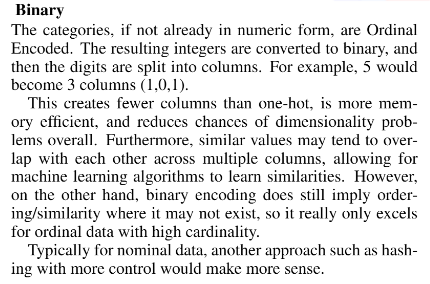

**Hashing**

Similar to one-hot encoding but with fewre new demensions but comes with cost of into loss due to collisions. This is normally not a problem unless there's a lot of overlap. With high cardinality, it's worth trying because you do have a lot more control versus something like a binary encoder.

**Хешування**

Подібне до одноразового кодування, але з меншою кількістю нових розмірів, але пов’язане з втратою через колізії. Зазвичай це не проблема, якщо немає великого збігу. З високою потужністю варто спробувати, оскільки ви маєте набагато більше контролю порівняно з чимось на зразок двійкового кодувальника.


Зрозумів, One-Hot Encoding не підходить, ймовірно, через велику кількість унікальних моделей, що може призвести до надмірної розмірності, або через бажання зберегти деяку ієрархічну інформацію.

Ось кілька методів кодування категоріальних ознак, які можуть бути кращими за One-Hot Encoding у вашому випадку, залежно від цілей та моделі машинного навчання:

1.  **Target Encoding (Mean Encoding):**
    * **Принцип:** Замість створення нових стовпців, кожна категорія замінюється на середнє значення цільової змінної для цієї категорії. Наприклад, бренд "Toyota" буде закодований як середнє значення `charges` для всіх автомобілів Toyota.
    * **Коли підходить:** Дуже ефективний метод, якщо є сильний зв'язок між категоріальною ознакою та цільовою змінною. Зменшує розмірність до одного стовпця на ознаку.
    * **Недоліки:**
        * **Витік даних (Data Leakage):** Це головний ризик. Якщо використовувати цільову змінну на всьому датасеті для кодування, модель може "запам'ятати" цільову змінну, що призведе до перенавчання (overfitting) на тренувальних даних та поганої узагальнюючої здатності на нових даних.
        * **Рішення для витоку даних:** Щоб уникнути витоку, використовуйте:
            * **K-Fold Cross-Validation:** Розділіть дані на K фолдів. Для кожного фолду, кодуйте категорії, використовуючи середнє значення цільової змінної з *інших* K-1 фолдів.
            * **Smoothing:** Додайте деяке глобальне середнє значення до розрахунку, щоб зменшити вплив категорій з малою кількістю спостережень.
            * **Додавання шуму:** Невеликий гауссівський шум до закодованих значень.
    * **Для вашого випадку:** Можна спробувати закодувати "Модель" за середнім `charges` для кожної моделі. Або навіть "Бренд" окремо.

2.  **Ordinal Encoding (Порядкове кодування):**
    * **Принцип:** Призначає кожній унікальній категорії ціле число. Наприклад, "Toyota": 0, "Honda": 1, "BMW": 2 і т.д.
    * **Коли підходить:**
        * Якщо між категоріями існує **природний порядок** (наприклад, "маленький", "середній", "великий").
        * Якщо ви хочете зберегти низьку розмірність.
    * **Недоліки:**
        * **Штучний порядок:** Якщо між категоріями немає природного порядку (як у випадку з брендами чи моделями авто), модель може неправильно інтерпретувати числовий порядок як ієрархію, що призведе до неправильних висновків. Наприклад, "Toyota" (0) не обов'язково "менша" або "гірша" за "BMW" (2).
    * **Для вашого випадку:** Це може бути проблематично, оскільки бренди та моделі не мають вбудованого порядкового значення.

3.  **Frequency/Count Encoding (Кодування за частотою/кількістю):**
    * **Принцип:** Замінює кожну категорію на частоту її появи (або кількість разів, коли вона зустрічається) у датасеті.
    * **Коли підходить:** Якщо частіші категорії мають якесь особливе значення для цільової змінної.
    * **Недоліки:** Різні категорії, які мають однакову частоту, будуть закодовані однаково, що може призвести до втрати інформації.
    * **Для вашого випадку:** Можна закодувати "Бренд" за кількістю його моделей, або "Модель" за її загальною кількістю у датасеті.

4.  **Binary Encoding (Бінарне кодування):**
    * **Принцип:** Спочатку кожна категорія перетворюється на ціле число (як у Ordinal Encoding), а потім це ціле число перетворюється на його бінарне представлення. Кожна цифра бінарного представлення стає окремим стовпцем.
    * **Коли підходить:** Зменшує розмірність порівняно з One-Hot Encoding (наприклад, для 100 категорій One-Hot дасть 100 стовпців, Binary Encoding – приблизно 7 стовпців ($\log_2 100 \approx 6.64$)).
    * **Недоліки:** Втрачається інтерпретовність, і може виникати штучний порядок між категоріями.
    * **Для вашого випадку:** Може бути варіантом для "Моделей", якщо їх кількість велика, але не настільки, щоб виправдати Hashing Trick.

5.  **Hashing Trick (Feature Hashing):**
    * **Принцип:** Як ми вже обговорювали, це перетворення категорій у числовий вектор фіксованого розміру за допомогою хеш-функції.
    * **Коли підходить:** Якщо у вас дуже багато унікальних категорій, і ви готові пожертвувати інтерпретовністю заради зниження розмірності та використання пам'яті. Це може бути актуально для "Моделей", якщо їх загальна кількість у всіх брендах досить велика.
    * **Недоліки:** Втрата інтерпретовності, можливі колізії.

6.  **Embeddings (для глибокого навчання):**
    * **Принцип:** Якщо ви використовуєте нейронні мережі, можна навчити Embedding-шар для кожної категоріальної ознаки. Модель сама "вивчає" оптимальне числове представлення категорій під час навчання.
    * **Коли підходить:** Якщо ви працюєте з глибоким навчанням. Дозволяє моделі захопити складні взаємозв'язки між категоріями та цільовою змінною.
    * **Недоліки:** Потребує нейронної мережі, складніше реалізувати, ніж інші методи.

### **Рекомендації для вашого випадку (11 брендів, 3-6 моделей на бренд):**

* **Для "Бренду" (11 варіантів):**
    * **One-Hot Encoding** все ще є хорошим варіантом, оскільки 11 стовпців - це не велика розмірність. Це дасть найбільшу гнучкість моделі, не вводячи штучного порядку.
    * Якщо все ж хочете уникнути One-Hot, спробуйте **Target Encoding** для бренду.

* **Для "Моделі" (загальна кількість моделей: 11 * (3..6) = 33..66 варіантів):**
    * **Target Encoding:** Ймовірно, найкращий варіант. Це збереже цінну інформацію про зв'язок моделі з цільовою змінною (`charges`), при цьому зберігаючи низьку розмірність. **Пам'ятайте про запобігання витоку даних!**
    * **Binary Encoding:** Якщо Target Encoding дає проблеми (наприклад, через витік даних або складність реалізації крос-валідації для Target Encoding), Binary Encoding може бути хорошим компромісом. Для 33-66 моделей це буде приблизно 5-7 стовпців ($\log_2 66 \approx 6$).
    * **Hashing Trick:** Можна використовувати, якщо кількість моделей буде рости значно, або якщо вам потрібна дуже висока швидкість обробки, і ви згодні з втратою інтерпретовності. Для 66 моделей, можливо, це надмірний метод, але якщо ви плануєте додавати тисячі моделей, то варто.

### **Як краще зробити це на практиці (за допомогою Python/Pandas/Scikit-learn):**

Найчастіше ви будете використовувати бібліотеку `category_encoders`, яка надає готові реалізації для багатьох з цих методів, включаючи Target Encoding та Binary Encoding.

```python
import pandas as pd
from sklearn.model_selection import KFold
# pip install category_encoders
import category_encoders as ce

# Припустимо, у вас є DataFrame 'df' з колонками 'brand', 'model', 'charges'

# --- 1. Target Encoding (Рекомендований для моделі) ---
# Для моделі це буде найефективніше, але потребує обережності з витоком даних.
# Використання K-Fold для уникнення витоку даних
kf = KFold(n_splits=5, shuffle=True, random_state=42)
encoder = ce.TargetEncoder(cols=['brand', 'model']) # Замініть на ваші колонки

# Створюємо копію датафрейму для кодування
df_encoded_target = df.copy()

# Застосовуємо кодування з використанням K-Fold для train/test split
# Це складніший, але правильний підхід
for train_index, val_index in kf.split(df):
    X_train, X_val = df.iloc[train_index], df.iloc[val_index]
    
    # Навчаємо енкодер тільки на тренувальних даних поточного фолду
    encoder.fit(X_train[['brand', 'model']], X_train['charges'])
    
    # Застосовуємо енкодер до валідаційних даних
    df_encoded_target.loc[val_index, ['brand_encoded', 'model_encoded']] = encoder.transform(X_val[['brand', 'model']])

# Після циклу df_encoded_target матиме закодовані 'brand_encoded' та 'model_encoded'
# Всі NaN значення, що можуть виникнути, заповніть глобальним середнім або іншим значенням.
# Для нових даних (які не були в тренувальному наборі) - використовуйте `encoder.transform(new_data)`.
# encoder.fit(df[['brand', 'model']], df['charges']) # Завчасно навчити на всіх даних (для кінцевої моделі, але не для крос-валідації)
# df_encoded_target = encoder.transform(df[['brand', 'model']]) # А потім трансформувати

# --- 2. Binary Encoding ---
encoder_binary = ce.BinaryEncoder(cols=['brand', 'model'])
df_encoded_binary = encoder_binary.fit_transform(df[['brand', 'model']])
# Потім об'єднайте df_encoded_binary з вашим оригінальним DataFrame

# --- 3. Hashing Trick ---
from sklearn.feature_extraction import FeatureHasher
# Виберіть кількість стовпців, наприклад, 10 для бренду і 30 для моделі
# Це можна зробити окремо або об'єднати
hasher_brand = FeatureHasher(n_features=10, input_type='string') # Якщо колонки містять рядки
hasher_model = FeatureHasher(n_features=30, input_type='string')

# Перетворення DataFrame на список рядків для кожної ознаки
# Для 'brand'
df_brand_hashed = hasher_brand.fit_transform(df['brand'].astype(str)) # .astype(str) якщо не рядок

# Для 'model'
df_model_hashed = hasher_model.fit_transform(df['model'].astype(str))

# Результати будуть розрідженими матрицями, які потім можна об'єднати з іншими ознаками.
# df_hashed = pd.concat([df_brand_hashed.to_dataframe(), df_model_hashed.to_dataframe()], axis=1) # Об'єднання
```

**Висновок:**

* **Найкращий баланс між розмірністю та збереженням інформації:** **Target Encoding**, але з обережним застосуванням K-Fold для уникнення витоку даних.
* **Хороший компроміс для зменшення розмірності:** **Binary Encoding**.
* **Для дуже великої кількості унікальних категорій:** **Hashing Trick**.

Враховуючи "невеликий датасет", я б все одно схилявся до **Target Encoding**, але обов'язково з крос-валідацією для його обчислення, щоб уникнути перенавчання.

Ви дуже слушно помітили важливі питання та виклики, які виникають при використанні Binary Encoding (та інших методів, крім One-Hot) у ситуаціях з невеликими даними та можливістю появи нових категорій.

Давайте розберемо кожен пункт.

### 1. Якщо кодування робити для навчальної вибірки, то в тестовій можуть бути моделі, яких не знає кодувальник, як з цим справитися?

Це класична проблема "нових/невідомих категорій" (unseen categories) або "холодного старту" (cold start problem).

**Binary Encoder (та більшість енкодерів з `category_encoders`) має вбудовану стратегію для цього:**

За замовчуванням:
* Коли ви викликаєте `encoder.fit(X_train)`, енкодер створює внутрішнє мапування всіх унікальних категорій з `X_train` на їхні бінарні представлення.
* Коли ви потім викликаєте `encoder.transform(X_test)`, якщо в `X_test` зустрічається категорія, якої не було в `X_train` (тобто її немає в мапінгу енкодера), `BinaryEncoder` зазвичай закодує її як **рядок нулів** (або іншу заздалегідь визначену комбінацію, яка по суті є "невідомою" категорією).

**Як це спрацьовує на практиці:**

1.  **Навчання енкодера:** Завжди викликайте `encoder.fit()` **тільки на тренувальній вибірці** (`X_train`).
2.  **Трансформація:** Застосовуйте `encoder.transform()` до **як тренувальної, так і тестової вибірок** (а потім і до нових даних у продакшені).

**Код приклад:**

```python
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split

# Приклад даних
data = {
    'brand': ['Toyota', 'Honda', 'BMW', 'Toyota', 'Mercedes', 'Honda', 'BMW', 'Audi', 'Toyota', 'Opel', 'BMW'],
    'model': ['Corolla', 'Civic', 'X5', 'Camry', 'C-Class', 'CRV', 'M3', 'A4', 'RAV4', 'Astra', 'X3'],
    'charges': [10000, 12000, 25000, 11000, 30000, 14000, 28000, 22000, 13000, 9000, 26000]
}
df = pd.DataFrame(data)

# Створимо тестові дані з новою моделлю
test_data = {
    'brand': ['Ford', 'Toyota', 'BMW'],
    'model': ['Focus', 'Yaris', 'Z4'], # 'Focus' - нова модель
    'charges': [8000, 10500, 29000]
}
df_test_unseen = pd.DataFrame(test_data)

# Розділення на тренувальну та тестову вибірки (якщо у вас їх ще немає)
# Тут просто для демонстрації, що енкодер "не бачив" деякі моделі
X_train = df[['brand', 'model']]
y_train = df['charges']

X_test = df_test_unseen[['brand', 'model']]
y_test = df_test_unseen['charges']


# 1. One-Hot Encoding для 'brand'
ohe_encoder = ce.OneHotEncoder(cols=['brand'], use_cat_names=True) # use_cat_names=True для зручних назв колонок

X_train_ohe_brand = ohe_encoder.fit_transform(X_train)
X_test_ohe_brand = ohe_encoder.transform(X_test) # Важливо: transform, не fit_transform

print("One-Hot Encoded Brand (Train):\n", X_train_ohe_brand)
print("\nOne-Hot Encoded Brand (Test - з новою 'Ford'):\n", X_test_ohe_brand)
# Зверніть увагу: 'Ford' в тестовій вибірці дасть нулі для всіх відомих брендів, і нових колонок не створить.

# 2. Binary Encoding для 'model'
binary_encoder = ce.BinaryEncoder(cols=['model'])

X_train_binary_model = binary_encoder.fit_transform(X_train)
X_test_binary_model = binary_encoder.transform(X_test) # Важливо: transform

print("\nBinary Encoded Model (Train):\n", X_train_binary_model)
print("\nBinary Encoded Model (Test - з новою 'Focus'):\n", X_test_binary_model)
# Зверніть увагу на рядок для 'Focus': всі бінарні колонки для моделі можуть бути 0,
# або мати певне унікальне значення, яке BinaryEncoder призначає для невідомих категорій.
# Зазвичай це перший доступний бінарний код, який не використовується існуючими категоріями,
# або просто 0-кодування, що вказує на "невідомість".
```

**Важливо:**
Якщо нова категорія в тестовій вибірці є **критичною** для моделі, і ви не можете дозволити їй бути закодованою як "невідома", вам доведеться:
* Збирати більше даних, щоб ці категорії з'явилися в тренувальній вибірці.
* Використовувати доменні знання, щоб вручну призначити цим новим категоріям представлення, схоже на схожі відомі категорії.
* Розглянути інші моделі, які можуть краще обробляти невідомі категорії (наприклад, деякі моделі, що базуються на деревах, можуть мати стратегії).

### 2. Як правильно здійснювати кодування моделі, оскільки певний порядок таки буде, чи в довільному порядку назв моделей чи наприклад обчислити середнє значення ціни за модель і відштовхуватися від цього. І як в такому разі бути з моделями яких не було в навчальній вибірці?

**Binary Encoding за своєю природою не вводить осмисленого порядку.** Він перетворює ціле число (яке є просто унікальним ID для кожної категорії) в бінарний код. Порядок, в якому категорії отримують ціле число, зазвичай є алфавітним або порядком їхнього першого появи. Це означає, що:

* **Порядок буде довільним:** `BinaryEncoder` призначить внутрішній цілочисельний ID кожній унікальній моделі (наприклад, `Corolla`: 0, `Civic`: 1, `X5`: 2 і т.д.), а потім перетворить ці ID в бінарний вигляд. Цей порядок не має ніякого зв'язку з `charges`.
* **Чи варто обчислювати середнє значення ціни?** Якщо ви **хочете, щоб порядок кодування відображав середню ціну**, то вам потрібен не Binary Encoding, а **Ordinal Encoding, сортований за середньою ціною**, або **Target Encoding**.

    **Я б радив:**
    * **Замість Binary Encoding:** Якщо "певний порядок" (наприклад, за ціною) є важливим, то вам потрібно саме **Target Encoding**. Це дозволяє моделі зрозуміти, що "моделі з високою середньою ціною" відрізняються від "моделей з низькою середньою ціною", і це виражається одним числовим значенням.

    * **Якщо все ж Binary Encoding:** Якщо ви вибираєте Binary Encoding і хочете якось "впорядкувати" його, це означає, що ви хочете внести деяку інформацію про ціну. Ви могли б, наприклад, **спершу сортувати моделі за їхньою середньою ціною в навчальній вибірці**, а потім вже передавати цю *сортовану* послідовність категорій енкодеру, якщо енкодер дозволяє вказати порядок. Але `BinaryEncoder` в `category_encoders` зазвичай просто бере внутрішній алфавітний порядок або порядок появи.
        **Навіть якщо ви ініціалізуєте `BinaryEncoder` з певним порядком, він не використовуватиме цей порядок для присвоєння бінарних кодів.** Бінарні коди присвоюються послідовним цілим числам, а ці числа зазвичай генеруються за алфавітним порядком або порядком появи.

    **Висновок для питання 2:** Якщо ви хочете відобразити інформацію про середню ціну, **Binary Encoding не є для цього найкращим інструментом**. Вам варто повернутися до розгляду **Target Encoding (з K-Fold валідацією!)**, оскільки він прямо кодує цю інформацію. Якщо ви все ж використовуєте Binary Encoding, порядок закодованих бітів буде довільним з точки зору цільової змінної.

### 3. Яким чином оцінювати важливість ознаки і вплив на цільову змінну, якщо статистичні тести видають результат для однієї ознаки, а не групи ознак, які представляють собою одну категоріальну змінну?

Це чудове питання! Після кодування (особливо One-Hot, Binary, Hashing) категоріальна ознака розбивається на кілька числових стовпців.

**Як оцінювати важливість та вплив:**

1.  **Для лінійних моделей (Лінійна регресія, Логістична регресія):**
    * **Коефіцієнти моделі:** Якщо ви використовуєте One-Hot Encoding, ви можете подивитися на коефіцієнти (ваги) моделі для кожного з створених стовпців. Величина коефіцієнта вказує на вплив цієї конкретної підкатегорії (наприклад, `brand_Toyota`). Однак, для всієї групи ознак (наприклад, `brand_Audi`, `brand_BMW` і т.д.) це не дає єдиного числа.
    * **F-статистика (ANOVA):** Для оцінки значущості всієї групи ознак, створених з однієї категоріальної змінної, використовується тест ANOVA (Analysis of Variance) у контексті лінійної регресії. Це дозволяє перевірити, чи впливає категоріальна змінна в цілому на цільову змінну, порівнюючи модель з ознакою та без неї. У Python це можна зробити за допомогою `statsmodels.formula.api.ols` та `smf.ols().fit().summary()`.
    * **Оцінка за допомогою R-квадрата:** Порівняйте R-квадрат моделі, що включає закодовану категоріальну ознаку, з моделлю без неї. Збільшення R-квадрата вказує на те, що ознака пояснює більше дисперсії в цільовій змінній.

2.  **Для моделей, що базуються на деревах (Random Forest, Gradient Boosting (XGBoost, LightGBM)):**
    * **Feature Importance (Важливість ознак):** Ці моделі часто надають показник "важливості ознак" (feature importance). Якщо ви закодували `model` за допомогою Binary Encoding, ви отримаєте важливість для кожного бінарного стовпця (`model_0`, `model_1`, `model_2` тощо).
    * **Групова важливість:** Щоб оцінити важливість **всієї оригінальної категоріальної ознаки** (наприклад, "модель"), вам потрібно сумувати або усереднити важливість всіх бінарних стовпців, що належать цій ознаці. Або, що краще, LightGBM і CatBoost мають вбудовані функції для обробки категоріальних ознак без попереднього кодування, і вони автоматично розраховують важливість для *оригінальної* категоріальної ознаки. Якщо це можливо, я б рекомендував спробувати ці бібліотеки, якщо ви використовуєте бустинг.

3.  **Permutation Importance:**
    * **Принцип:** Це більш надійний і модель-агностичний метод. Ви тренуєте модель, а потім оцінюєте, наскільки погіршується продуктивність моделі, коли значення певної ознаки (або групи ознак) випадковим чином "перемішуються" (shuffled).
    * **Як це працює:** Ви можете перемішати значення в **оригінальному стовпці "model"** (до кодування), потім перекодувати і перенавчити модель. Або ж, після кодування, перемішати **всі бінарні стовпці, що відповідають "model"**, і побачити, наскільки це вплине на метрику моделі. Велике падіння продуктивності свідчить про високу важливість.
    * **Реалізація:** `sklearn.inspection.permutation_importance`

4.  **SHAP Values (SHapley Additive exPlanations):**
    * **Принцип:** Це потужний метод інтерпретовності моделей, який може показувати, як кожна ознака (або група ознак) впливає на прогноз для окремих спостережень та в цілому.
    * **Для категоріальних ознак:** SHAP може показувати сукупний вплив усіх стовпців, що походять від однієї категоріальної ознаки. Це дозволяє зрозуміти загальний внесок "моделі" або "бренду".

### **Короткі поради:**

* **Якщо витік даних є проблемою з Target Encoding:** Binary Encoding є хорошою альтернативою. Він зменшує розмірність і не страждає від витоку даних, але втрачає інформацію про порядок або середнє значення.
* **Для інтерпретовності:**
    * Для **One-Hot Encoded Brand**: дивіться на коефіцієнти лінійних моделей або важливість ознак для моделей на деревах.
    * Для **Binary Encoded Model**: важче інтерпретувати вплив окремих бітів. Краще використовувати **Permutation Importance** або **SHAP** для оцінки важливості *всієї групи* бінарних стовпців, що представляють модель.
* **Розгляньте моделі, що працюють з категоріями нативно:** Для моделей бустингу (Gradient Boosting) `LightGBM` і `CatBoost` можуть безпосередньо працювати з категоріальними ознаками (не потрібно кодувати їх вручну), і вони краще обробляють невідомі категорії, а також дають більш осмислену важливість ознак.

Вибір методу кодування залежить від розміру даних, кількості унікальних категорій, моделі, яку ви використовуєте, та того, наскільки важливою є інтерпретовність.

Ви підняли дуже важливе питання! Якщо в тестовій вибірці з'являються *нові, невідомі* моделі, які кодуються як нулі Binary Encoder-ом, і при цьому ці моделі є **абсолютно різними** за своїми характеристиками та ціною (тобто вони повинні мати різний вплив на цільову змінну `charges`), то **Binary Encoding дійсно не буде ефективним і може навіть нашкодити продуктивності моделі**.

Присвоєння одного і того ж "нульового" коду кільком різним новим моделям призводить до того, що модель не може їх розрізнити, і всі вони сприйматимуться як одна й та сама сутність. Це називається **втратою інформації**.

### **Як бути в такому випадку? (Стратегії для нових/невідомих категорій)**

Оскільки у вас "дуже мало даних", це ускладнює ситуацію, оскільки складніше навчитися на нові категорії.

Ось кілька стратегій, які можна застосувати, починаючи від найпростіших до складніших:

1.  **Повторне кодування всіх даних (Не рекомендується, але варто розуміти):**
    * **Ідея:** Об'єднати тренувальну та тестову вибірки, закодувати всі дані разом, а потім знову розділити.
    * **Проблема:** Це призводить до **витоку даних (data leakage)**. Модель "бачить" інформацію з тестової вибірки під час навчання через енкодер, що призводить до завищених метрик на тестовій вибірці та поганої узагальнюючої здатності на реальних нових даних. **Ніколи не робіть цього для оцінки моделі.**

2.  **Стратегія 1: Об'єднання рідкісних/нових категорій у "Інше" (або "Невідомо")**
    * **Принцип:** Якщо у вас є невеликий набір категорій, які з'являються рідко або є новими (у тестовій вибірці), об'єднайте їх в одну спеціальну категорію, наприклад, "Інше" (`'Other'` або `'Unknown'`).
    * **Як реалізувати:**
        1.  На етапі підготовки даних:
            * Визначте набір унікальних моделей у `X_train`.
            * Для кожної моделі в `X_test`, якщо вона не знаходиться в цьому наборі `X_train` моделей, замініть її назву на `'Other'`.
            * **Важливо:** Якщо і в `X_train` є моделі, які зустрічаються, наприклад, менше 5 разів, ви можете і їх замінити на `'Other'`, щоб уникнути надмірного детального кодування рідкісних випадків.
        2.  Потім застосуйте Binary Encoding.
    * **Плюси:** Просто, дозволяє моделі вивчити спільні характеристики "невідомих" або "рідкісних" моделей.
    * **Мінуси:** Втрачається специфічна інформація про конкретну нову модель (наприклад, "Ford Focus" втратить свою унікальність і стане просто "Інше"). Якщо "Інше" включає дуже різноманітні моделі, це може заплутати модель.

3.  **Стратегія 2: Mean Encoding (Target Encoding) з додаванням "інформації про невідоме"**
    * **Принцип:** Використовуємо Target Encoding, але модифікуємо його для обробки невідомих категорій.
    * **Як реалізувати:**
        1.  Як і раніше, навчаємо `TargetEncoder` **тільки на `X_train`**.
        2.  Коли `TargetEncoder` зустрічає невідому модель в `X_test`:
            * Замість `NaN` (як це може бути за замовчуванням) або середнього значення `X_train`, ви можете замінити її на **глобальне середнє значення цільової змінної (`charges`) з `X_train`**. Це дасть моделі базове розуміння, що це "середня" модель, якщо вона не знає нічого іншого.
            * **`category_encoders.TargetEncoder` за замовчуванням обробляє невідомі значення, замінюючи їх на глобальне середнє цільової змінної тренувального набору.** Це велика перевага!
    * **Плюси:** Зберігає числовий характер ознаки, дає моделі хоч якусь базову інформацію про невідому категорію, яка є кращою за випадковий бінарний код або повний нуль.
    * **Мінуси:** Все ще є ризик витоку даних, якщо не використовувати крос-валідацію для обчислення Target Encoding, або якщо невідомих категорій багато і вони дуже відрізняються.

4.  **Стратегія 3: Використання моделі, яка нативно підтримує категоріальні ознаки (Найочевидніше рішення для невеликих даних)**
    * **Принцип:** Деякі сучасні моделі машинного навчання, особливо дерева рішень та градієнтний бустинг, можуть безпосередньо працювати з категоріальними ознаками без попереднього кодування.
    * **Рекомендовані бібліотеки:**
        * **CatBoost:** Ця бібліотека спеціально розроблена для роботи з категоріальними ознаками. Вона має вбудовані алгоритми для їх ефективного оброблення, включаючи автоматичну обробку невідомих категорій. Вам просто потрібно вказати, які стовпці є категоріальними.
        * **LightGBM:** Також може працювати з категоріальними ознаками без попереднього One-Hot. Потрібно вказати `categorical_feature` параметри.
    * **Плюси:**
        * Не потрібно турбуватися про витік даних через кодування.
        * Автоматична та часто ефективна обробка невідомих категорій.
        * Краща інтерпретовність важливості ознак для оригінальних категоріальних стовпців.
        * Часто краща продуктивність на табличних даних.
    * **Мінуси:** Це означає перехід на інший тип моделі, якщо ви планували використовувати лінійну регресію або інші.

### **Що б я рекомендував у вашому випадку ("дуже мало даних", "різні моделі одного бренду, яких не було в навчальній"):**

1.  **Спробуйте `CatBoost` або `LightGBM` першими.** Це найменш клопіткий і часто найефективніший спосіб для роботи з категоріальними ознаками, особливо коли є нові категорії. Вони добре справляються з табличними даними і можуть бути кращими за лінійні моделі у багатьох випадках.

    ```python
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from catboost import CatBoostRegressor # або from lightgbm import LGBMRegressor

    # Припустимо, у вас є df з 'brand', 'model', 'charges'
    # ... (код створення df) ...

    # Розділення даних
    X = df[['brand', 'model']]
    y = df['charges']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Визначення категоріальних ознак
    categorical_features_indices = [X.columns.get_loc(col) for col in ['brand', 'model']]
    # Або просто за назвами
    categorical_feature_names = ['brand', 'model']

    # Ініціалізація та навчання CatBoost
    model = CatBoostRegressor(
        iterations=100, # Кількість дерев
        learning_rate=0.1,
        depth=6,
        loss_function='RMSE', # Ваша функція втрат
        random_seed=42,
        verbose=0 # Приховати деталі навчання
    )

    model.fit(X_train, y_train, cat_features=categorical_feature_names)

    # Прогнозування на тестовій вибірці
    predictions = model.predict(X_test)

    # CatBoost автоматично обробляє нові категорії в тестовій вибірці.
    # Зазвичай він призначає їм "спеціальне" представлення або використовує деякі базові статистики.
    ```

2.  **Якщо ви *мусите* використовувати лінійні моделі або інші, які вимагають кодування:**
    * **Mean Encoding (Target Encoding) з крос-валідацією для тренування енкодера та заповненням глобальним середнім для невідомих значень** є найкращим компромісом. Це збереже інформацію про ціну, яка, ймовірно, є найважливішою для `charges`.
    * **Стратегія "Інше":** Якщо у вас дуже мало категорій або ви знаєте, що нові моделі не мають особливих характеристик, які варто виокремлювати, просто об'єднання їх в одну категорію "Інше" може бути прийнятним.

### **Підсумок:**

Проблема невідомих категорій є серйозною для Binary Encoding, якщо ці категорії повинні мати різний вплив. Найкращим рішенням, особливо для невеликих даних, є використання моделей (наприклад, CatBoost), які можуть обробляти категоріальні ознаки нативно. Якщо це не варіант, то Target Encoding з ретельною обробкою витоку даних та невідомих категорій буде наступним найкращим вибором.

GROQ

Якщо у вас є 11 варіантів брендів автомобілів і для кожного бренду існує від 3 до 6 моделей, загальна кількість різних моделей становить близько 33-66 (11 брендів * мінімальна/максимальна кількість моделей). Однак ви хочете закодувати ці дані в максимум 5 стовбцях.

У такому випадку, використання бінарного кодування або гарячого кодування безпосередньо може бути не дуже ефективним через велику кількість категорій.

Одним із підходів може бути використання комбінації кодування категорій:

1. **Кодування брендів**: Ви можете використовувати ціле число або категоріальне кодування для представлення 11 брендів. Наприклад, ціле число від 1 до 11.

2. **Кодування моделей**: Оскільки кількість моделей для кожного бренду варіюється від 3 до 6, ви можете використати бінарне кодування для представлення моделей для кожного бренду.

Проте, якщо ви хочете взагалі мінімізувати кількість стовбців і використовувати максимум 5 стовбців для представлення і бренду, і моделі, то можна розглянути такі підходи:

- **Label Encoding для брендів і бінарне кодування для моделей**: Ви можете закодувати 11 брендів за допомогою цілих чисел (1 стовбець). Для моделей можна використати бінарне кодування. Наприклад, якщо максимальна кількість моделей для бренду — 6, то потрібно 3 біти (2^3 = 8), щоб закодувати всі можливі моделі. Таким чином, ви використаєте 4 стовбці (1 для бренду і 3 для моделей).

- **Використання Hashing**: Інший підхід — використовувати техніку хешування (hashing), щоб зменшити розмірність даних. Наприклад, використати функцію хешування, щоб відобразити назви моделей і брендів у бінарні вектори фіксованої довжини. Проте, цей підхід може привести до колізій.

Враховуючи обмеження і вимоги, найбільш простим і ефективним підходом може бути використання label encoding для брендів і бінарного кодування для моделей.

Наприклад:
- 1 стовбець для бренду (ціле число від 1 до 11).
- 3 стовбці для бінарного кодування моделей (дозволяє закодувати до 8 різних моделей).

Таким чином, ви використаєте всього 4 стовбці, що задовольняє вашим вимогам.

Якщо потрібно ще зменшити кількість стовбців, можна досліджувати інші підходи, такі як використання Embeddings або певних типів автоенкодерів для зменшення розмірності, але це буде більш складно і вимагатиме більше даних і обчислювальних ресурсів.

In [ ]:
# import pandas as pd
# import category_encoders as ce
# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer
# # from sklearn.preprocessing import FunctionTransformer # Більше не потрібен для add_brand_model_feature всередині CT

# # --- 1. Створення демонстраційного датасету ---
# # Навчальний набір
# data_train = {
#     'brand': ['Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi',
#               'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW',
#               'Mahindra', 'Mahindra', 'Mahindra',
#               'Toyota', 'Toyota', 'Toyota', 'Toyota'],
#     'model': ['A4', 'Q3', 'A6', 'A3', 'Q7', 'A5',
#               'X1', '5 Series', 'X3', '7 Series', 'X5', '3 Series',
#               'Scorpio', 'Thar', 'XUV300',
#               'Corolla', 'Camry', 'RAV4', 'Yaris'],
#     'charges': [25000, 28000, 35000, 22000, 45000, 30000,
#                 30000, 38000, 32000, 42000, 48000, 36000,
#                 15000, 18000, 20000,
#                 20000, 22000, 25000, 18000]
# }
# df_train = pd.DataFrame(data_train)

# # Тестовий набір
# data_test = {
#     'brand': ['Audi', 'BMW', 'Audi', 'Hyundai', 'Mahindra'],
#     'model': ['A4', 'X1', 'A8', 'Creta', 'Scorpio'],
#     'charges': [26000, 31000, 38000, 17000, 16000]
# }
# df_test = pd.DataFrame(data_test)

# print("--- Оригінальний тренувальний датасет ---")
# print(df_train)
# print("\n--- Оригінальний тестовий датасет ---")
# print(df_test)

# # --- 2. Створення комбінованої ознаки 'brand_model' (ПЕРЕДУМОВА) ---
# # Цей крок виконується ДО передачі даних у ColumnTransformer.
# def create_combined_feature_inplace(df_input):
#     """Створює комбіновану ознаку 'brand_model' безпосередньо в DataFrame."""
#     df_input['brand_model'] = df_input['brand'] + '_' + df_input['model']
#     return df_input # Повертаємо змінений DataFrame

# # Застосовуємо до обох наборів даних
# df_train = create_combined_feature_inplace(df_train)
# df_test = create_combined_feature_inplace(df_test)

# print("\n--- Тренувальний датасет з 'brand_model' ---")
# print(df_train[['brand', 'model', 'brand_model']])
# print("\n--- Тестовий датасет з 'brand_model' ---")
# print(df_test[['brand', 'model', 'brand_model']])

# # --- 3. Розділення даних на ознаки (X) та цільову змінну (y) ---
# X_train = df_train.drop(columns=['charges'])
# y_train = df_train['charges']
# X_test = df_test.drop(columns=['charges'])
# y_test = df_test['charges']

# # --- 4. Визначення трансформацій ---

# # Колонки, які будемо трансформувати
# brand_cols = ['brand']
# model_cols = ['brand_model']

# # Створюємо ColumnTransformer
# # remainder='drop' видаляє оригінальні 'model' та 'brand_model' (і 'brand', які вже замінені)
# preprocessor = ColumnTransformer(
#     transformers=[
#         # One-Hot Encoding для 'brand'
#         ('ohe_brand', ce.OneHotEncoder(use_cat_names=True), brand_cols),
#         # Binary Encoding для 'brand_model'
#         ('binary_model', ce.BinaryEncoder(), model_cols)
#     ],
#     remainder='drop' # Видаляємо всі колонки, які не були закодовані (наприклад, оригінальні 'model')
# )

# # --- 5. Застосування кодування ---

# # Fit (навчання) ColumnTransformer на тренувальних даних
# # Тепер 'brand_model' вже існує в X_train
# X_train_processed_array = preprocessor.fit_transform(X_train)

# # Трансформація тестових даних (використовуємо вже навчений preprocessor)
# X_test_processed_array = preprocessor.transform(X_test)

# # --- 6. Створення DataFrame з результатів ---

# # Отримаємо назви колонок після трансформації
# feature_names = preprocessor.get_feature_names_out()

# df_train_processed = pd.DataFrame(X_train_processed_array, columns=feature_names)
# df_test_processed = pd.DataFrame(X_test_processed_array, columns=feature_names)

# # Додамо 'charges' назад, якщо потрібно працювати з повним DataFrame
# df_train_final = pd.concat([df_train_processed, y_train.reset_index(drop=True)], axis=1)
# df_test_final = pd.concat([df_test_processed, y_test.reset_index(drop=True)], axis=1)

# print("\n--- Закодований тренувальний датасет (фрагмент) ---")
# print(df_train_final.head())
# print("Фінальна розмірність тренувальних даних:", df_train_final.shape)

# print("\n--- Закодований тестовий датасет (фрагмент) ---")
# print(df_test_final.head())
# print("Фінальна розмірність тестових даних:", df_test_final.shape)

# # --- 7. Перевірка невідомих комбінацій у тестовій вибірці ---
# print("\n--- Перевірка кодування для 'Hyundai_Creta' (невідома комбінація) ---")
# # Знайдемо рядок, що відповідає 'Hyundai_Creta' у df_test
# idx_hyundai = df_test[df_test['brand'] == 'Hyundai'].index[0]
# print(df_test_final.iloc[idx_hyundai])


# print("\n--- Перевірка кодування для 'Audi_A8' (існуючий бренд, нова модель) ---")
# idx_audi_a8 = df_test[df_test['model'] == 'A8'].index[0]
# print(df_test_final.iloc[idx_audi_a8])

--- Оригінальний тренувальний датасет ---
       brand     model  charges
0       Audi        A4    25000
1       Audi        Q3    28000
2       Audi        A6    35000
3       Audi        A3    22000
4       Audi        Q7    45000
5       Audi        A5    30000
6        BMW        X1    30000
7        BMW  5 Series    38000
8        BMW        X3    32000
9        BMW  7 Series    42000
10       BMW        X5    48000
11       BMW  3 Series    36000
12  Mahindra   Scorpio    15000
13  Mahindra      Thar    18000
14  Mahindra    XUV300    20000
15    Toyota   Corolla    20000
16    Toyota     Camry    22000
17    Toyota      RAV4    25000
18    Toyota     Yaris    18000

--- Оригінальний тестовий датасет ---
      brand    model  charges
0      Audi       A4    26000
1       BMW       X1    31000
2      Audi       A8    38000
3   Hyundai    Creta    17000
4  Mahindra  Scorpio    16000

--- Тренувальний датасет з 'brand_model' ---
       brand     model       brand_model
0       Audi

In [13]:
# ! pip install category_encoders

# from category_encoders import BinaryEncoder


# X = pandas.DataFrame(
#         {"Country" : ["USA", "Italy", "Lebanon", "USA"]}
#     )

# encoder = BinaryEncoder()

# encoded_X = encoder.fit_transform(X)

In [14]:
# Створення словника з двійковими кодами для моделей різних брендів
model_encoding_dict = {}
max_bits = int(np.ceil(np.log2(df.groupby('Brand').Model.nunique().max())))
bit_cols = [f'Model_bin_{i}' for i in range(max_bits)]

for brand in df['Brand'].unique():
    models = sorted(df[df['Brand'] == brand]['Model'].unique())
    model_codes = {}

    for i, model in enumerate(models, start = 1):
        binary = list(map(int, list(np.binary_repr(i, width=max_bits))))
        model_codes[model] = binary

    model_encoding_dict[brand] = model_codes

In [15]:
df_coder = pd.DataFrame(model_encoding_dict)
df_coder.shape # Перевірка чи всі моделі закодовано

(58, 11)

In [16]:
df_coder

,Toyota,Honda,Ford,Maruti,Hyundai,Tata,Mahindra,Volkswagen,Audi,BMW,Mercedes
Camry,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corolla,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fortuner,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova Crysta,"[1, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yaris,"[1, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR-V,NaN,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Civic,NaN,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WR-V,NaN,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def encode_model(row):
  """
  Функція для кодування
  """
  brand = row['Brand']
  model = row['Model']
  if brand in model_encoding_dict:
      codebook = model_encoding_dict[brand]
      if model in codebook:
          return codebook[model]
  # Якщо бренд або модель невідомі — повертаємо [0, 0, 0]
  return [0] * max_bits # Це більше перевірка на помилку в коді

In [18]:
# Заповнення нових стовбчиків нулями
for col in bit_cols:
    X_train[col] = 0
    X_test[col] = 0

# Зміна на закодовані значення
X_train[bit_cols] = X_train.apply(encode_model, axis=1, result_type='expand')
X_test[bit_cols] = X_test.apply(encode_model, axis=1, result_type='expand')

In [19]:
pd.set_option('display.max_columns', 100)
display(X_test[['Brand',	'Model', 'Model_bin_0',	'Model_bin_1',	'Model_bin_2']].head(10)) # Значення, щоб звіритися зі словником

,Brand,Model,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,1,0,1
41,Hyundai,Santro,0,1,1
92,Volkswagen,Vento,1,1,0
14,Maruti,Ertiga,0,0,1
68,Ford,Aspire,0,0,1
31,Hyundai,Elantra,0,1,0
89,Hyundai,Venue,1,0,1
15,Honda,City,0,1,0
21,Ford,Figo,1,0,0
60,Hyundai,Verna,1,1,0


In [20]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,1
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1


(None, None)

In [21]:
X_train.shape, X_test.shape

((80, 28), (20, 28))

# Завдання

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [22]:
df_train = pd.concat([X_train.select_dtypes(['int', 'float']), y_train], axis = 1)
corr_matrix = df_train.corr()
price_corr = df_train.corr().iloc[-1, :-1]
price_corr[price_corr.abs() > 0.5].sort_values()

,Price
Mileage,-0.638404
Transmission_code,0.680731
Engine,0.710561
Power,0.849137


In [23]:
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.150353,-0.070008,0.232921,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,0.086046,0.135988,-0.192994,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.104811,-0.017872,-0.034455,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.195960,0.035766,0.059184,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.266739,-0.110142,0.086471,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,-0.029746,0.007591,0.044817,0.000979
Fuel_Type_code,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,0.103973,-0.349593,0.098433,-0.110782
Transmission_code,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,-0.126071,0.005775,0.085553,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.041996,0.008336,-0.025071,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.004984,0.048475,0.092235,0.477522


**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [24]:
X_train = X_train.select_dtypes(['int', 'float'])
X_test = X_test.select_dtypes(['int', 'float'])

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error
lr = LinearRegression().fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)
print(f'rmse_train = {root_mean_squared_error(predictions_train, y_train)}')
print(f'rmse_test = {root_mean_squared_error(predictions_test, y_test)}')

rmse_train = 209567.75578770583
rmse_test = 256802.21174231052


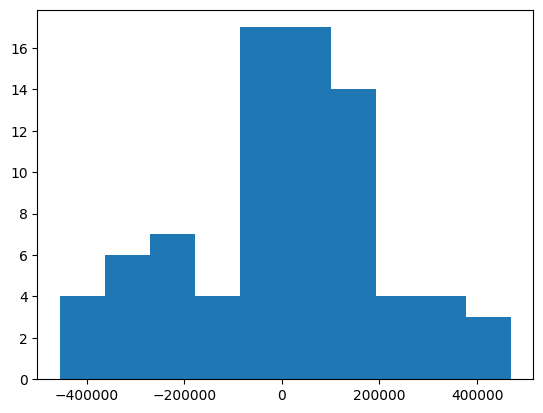

In [26]:
errors_train = predictions_train -  y_train
plt.hist(errors_train)
plt.show()

(array([2., 4., 0., 3., 3., 3., 0., 1., 1., 3.]),
 array([-355148.3526554 , -272697.26695005, -190246.18124469,
        -107795.09553933,  -25344.00983397,   57107.07587139,
         139558.16157674,  222009.2472821 ,  304460.33298746,
         386911.41869282,  469362.50439817]),
 <BarContainer object of 10 artists>)

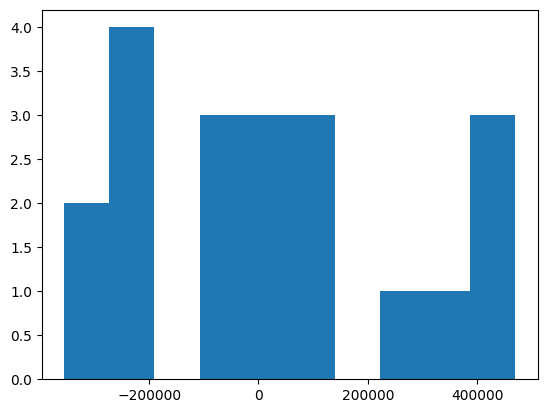

In [27]:
errors_test = predictions_test -  y_test
#plt.plot(errors_test, 'o');
plt.hist(errors_test)

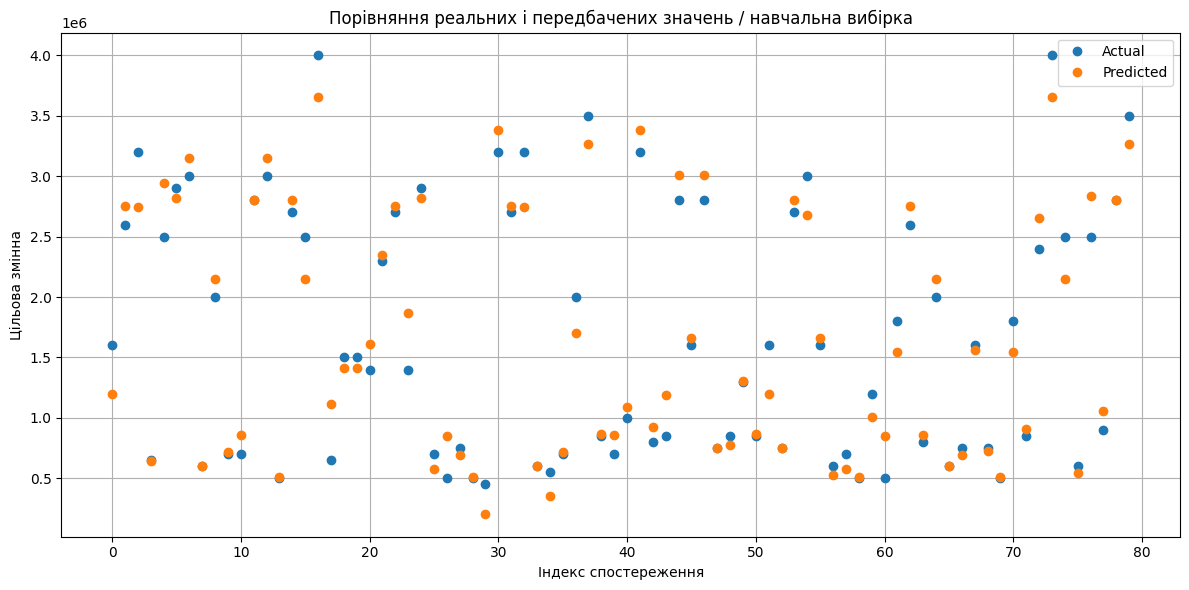

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train.values, label='Actual', marker='o', linestyle='None')
plt.plot(predictions_train, label='Predicted', marker='o', linestyle='None')
plt.title('Порівняння реальних і передбачених значень / навчальна вибірка')
plt.xlabel('Індекс спостереження')
plt.ylabel('Цільова змінна')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

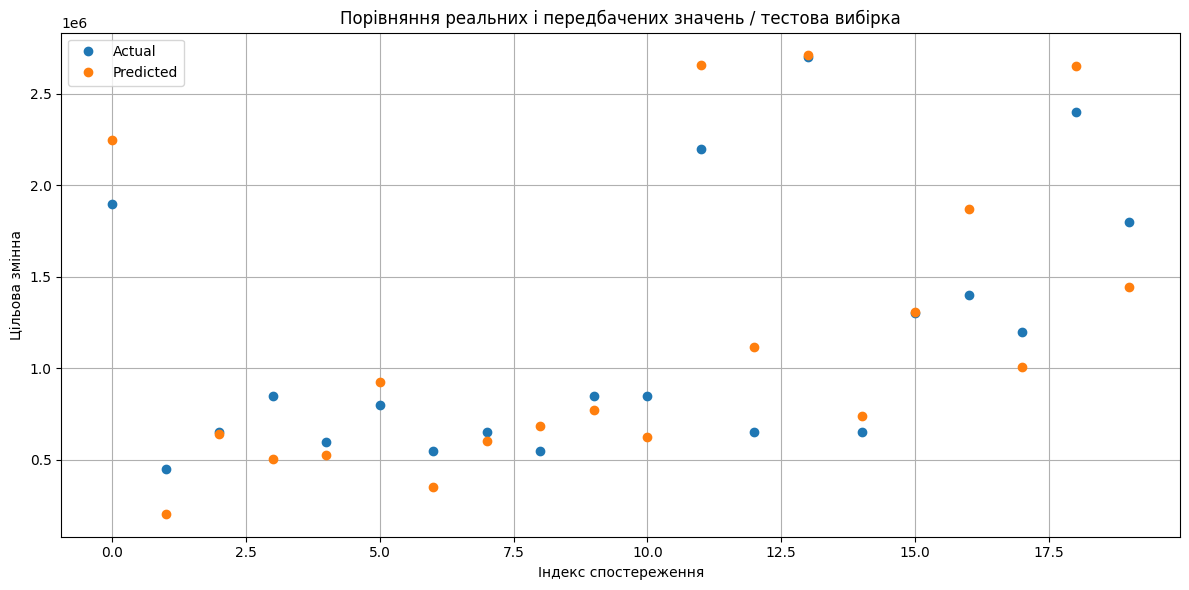

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='None')
plt.plot(predictions_test, label='Predicted', marker='o', linestyle='None')
plt.title('Порівняння реальних і передбачених значень / тестова вибірка')
plt.xlabel('Індекс спостереження')
plt.ylabel('Цільова змінна')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [30]:
columns_for_Scaler = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Owner_Type_Codes']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[columns_for_Scaler])

X_train[columns_for_Scaler] = scaler.transform(X_train[columns_for_Scaler])
X_test[columns_for_Scaler] = scaler.transform(X_test[columns_for_Scaler])

display(X_train.head(), X_test.head())

# scaled_inputs_train = scaler.transform(X_train[columns_for_Scaler])
# scaled_inputs_test = scaler.transform(X_test[columns_for_Scaler])

# X_col = ['Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Ford', 'Honda',
#        'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
#        'Volkswagen', 'Model_bin_0', 'Model_bin_1', 'Model_bin_2']
# X_train_data = X_train[X_col].values
# X_test_data = X_test[X_col].values

# X_train = np.concatenate((scaled_inputs_train, X_train_data), axis=1)
# X_test = np.concatenate((scaled_inputs_test, X_test_data), axis=1)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.535303,1,0,0
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.994135,0,1,1
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.994135,1,0,0
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.535303,1,1,0
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.535303,1,0,0


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
17,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535303,1,0,1
41,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.064742,0,1,1
92,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.535303,1,1,0
14,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.994135,0,0,1
68,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.064742,0,0,1


In [31]:
lr = LinearRegression().fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)
print(f'rmse_train = {root_mean_squared_error(predictions_train, y_train)}')
print(f'rmse_test = {root_mean_squared_error(predictions_test, y_test)}')

rmse_train = 209567.75578770618
rmse_test = 256802.21174230677


In [32]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = root_mean_squared_error(targets, predictions)
  print('Loss:', loss)
  return model

In [33]:
model = train_model_show_rmse(X_train, y_train)

Loss: 209567.75578770618


In [35]:
column_names = list(X_train.columns)
weights_df = pd.DataFrame({
    'feature': np.append(column_names, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
23,1,1.577346e+06
8,Audi,7.429146e+05
9,BMW,7.373648e+05
15,Mercedes,7.311762e+05
4,Power,4.928239e+05
7,Transmission_code,2.433515e+05
17,Toyota,1.231807e+05
22,Model_bin_2,5.480587e+04
20,Model_bin_0,3.525382e+04
21,Model_bin_1,3.435439e+04


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [36]:
import statsmodels.api as sm
def df_statsmodels(X, y):
  X = sm.add_constant(X)
  model = sm.OLS(y,X)
  results = model.fit()
  print('Параметри:')
  print(results.params)
  print(results.summary())
  return results

In [37]:
results1 = df_statsmodels(X_train, y_train)

Параметри:
const                1.445901e+06
Year                -2.319949e+04
Kilometers_Driven   -1.008313e+05
Mileage             -1.347348e+05
Engine              -3.390064e+04
Power                4.928239e+05
Seats               -1.044428e+03
Fuel_Type_code      -3.596194e+05
Transmission_code    2.433515e+05
Audi                 8.743601e+05
BMW                  8.688103e+05
Ford                -1.746254e+05
Honda               -6.149086e+04
Hyundai             -3.777885e+05
Mahindra            -4.357453e+05
Maruti              -2.402593e+05
Mercedes             8.626217e+05
Tata                -1.155980e+04
Toyota               2.546262e+05
Volkswagen          -1.130484e+05
Owner_Type_Codes     3.224860e+04
Model_bin_0          3.525382e+04
Model_bin_1          3.435439e+04
Model_bin_2          5.480587e+04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959


In [38]:
results1.rsquared, results1.rsquared_adj

(np.float64(0.9589127788608556), np.float64(0.9430545531580279))

In [39]:
results1.params

,0
const,1.445901e+06
Year,-2.319949e+04
Kilometers_Driven,-1.008313e+05
Mileage,-1.347348e+05
Engine,-3.390064e+04
Power,4.928239e+05
Seats,-1.044428e+03
Fuel_Type_code,-3.596194e+05
Transmission_code,2.433515e+05
Audi,8.743601e+05


In [40]:
results1.bse

,0
const,134998.479228
Year,62085.977590
Kilometers_Driven,57744.627889
Mileage,60040.736673
Engine,72567.861681
Power,80476.549305
Seats,43744.048192
Fuel_Type_code,95942.082913
Transmission_code,101425.803557
Audi,112703.745036


In [41]:
#pvalues = results.pvalues.sort_values()
pvalues_05 = results1.pvalues[results1.pvalues < 0.05].index

In [42]:
pvalues_05

Index(['const', 'Mileage', 'Power', 'Fuel_Type_code', 'Transmission_code',
       'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Mercedes', 'Toyota'],
      dtype='object')

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [43]:
#df_statsmodels(X[pvalues_05], y_train)
X = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X[pvalues_05])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.99e-42
Time:                        19:58:59   Log-Likelihood:                -1098.5
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      69   BIC:                             2245.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.341e+06   6.64e+0

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [45]:
pvalues_025 = results1.pvalues[results1.pvalues < 0.25].index
pvalues_025

Index(['const', 'Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_code',
       'Transmission_code', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
       'Maruti', 'Mercedes', 'Toyota'],
      dtype='object')

In [46]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X[pvalues_025])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           4.40e-40
Time:                        19:59:20   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      66   BIC:                             2251.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.41e+06   8.43e+0

In [97]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.99e-42
Time:                        19:57:18   Log-Likelihood:                -1098.5
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      69   BIC:                             2245.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.341e+06   6.64e+0